# Data Ingest and Visualization - Matplotlib and Pandas
* From [Data Ingest and Visualization - Matplotlib and Pandas](https://adyork.github.io/python-oceanography-lesson/13-putting-it-all-together/index.html)


## Putting it all together

Up to this point, we have walked through tasks that are often
involved in handling and processing data using the workshop-ready cleaned
files that we have provided. In this wrap-up exercise, we will perform
many of the same tasks with real data sets. This lesson also covers data
visualization.

As opposed to the previous ones, this lesson does not give step-by-step
directions to each of the tasks. Use the lesson materials you've already gone
through as well as the Python documentation to help you along.

## Obtain data

There are many repositories online from which you can obtain data. We are
providing you with one data file to use with these exercises, but feel free to
use any data that is relevant to your research. The file
[`bouldercreek_09_2013.txt`](https://raw.githubusercontent.com/adyork/python-oceanography-lesson/gh-pages/data/bouldercreek_09_2013.txt)
contains stream discharge data, summarized at
15 minute intervals (in cubic feet per second) for a streamgage on Boulder
Creek at North 75th Street (USGS gage06730200) for 1-30 September 2013. If you'd
like to use this dataset, please find it in the data folder.

## Clean up your data and open it using Python and Pandas

To begin, import your data file into Python using Pandas. Did it fail? Your data
file probably has a header that Pandas does not recognize as part of the data
table. Remove this header, but do not simply delete it in a text editor! Use
either a shell script or Python to do this - you wouldn't want to do it by hand
if you had many files to process.

If you are still having trouble importing the data as a table using Pandas,
check the documentation. You can open the docstring in an ipython notebook using
a question mark. For example:

In [6]:
import pandas as pd
pd.read_csv?


Look through the function arguments to see if there is a default value that is
different from what your file requires (Hint: the problem is most likely the
delimiter or separator. Common delimiters are `','` for comma, `' '` for space,
and `'\t'` for tab).

Create a DataFrame that includes only the values of the data that are useful to
you. In the streamgage file, those values might be the date, time, and discharge
measurements. Convert any measurements in imperial units into SI units. You can
also change the name of the columns in the DataFrame like this:

In [28]:
df = pd.DataFrame({'1stcolumn':[100,200], '2ndcolumn':[10,20]}) # this just creates a DataFrame for the example!
print('With the old column names:\n') # the \n makes a new line, so it's easier to see
print(df)

With the old column names:

   1stcolumn  2ndcolumn
0        100         10
1        200         20


In [29]:
df.columns = ['FirstColumn', 'SecondColumn'] # rename the columns!
print('\n\nWith the new column names:\n')
print(df)



With the new column names:

   FirstColumn  SecondColumn
0          100            10
1          200            20



## Navigating the vast landscape of python visualization tools

There are some amazing plotting packages out there and a rich ecosystem of tools.  It can be daunting to pick one for your purpose. pyviz.org is one resource that aims to help you figure out what to use.

"The [PyViz.org](https://pyviz.org/) website is an open platform for helping users decide on the best open-source (OSS) Python data visualization tools for their purposes, with links, overviews, comparisons, and examples."

## Matplotlib package

[Matplotlib](https://matplotlib.org/) is a Python package that is widely used throughout the scientific Python community to create high-quality and publication-ready graphics. It supports a wide range of raster and vector graphics formats including PNG, PostScript, EPS, PDF and SVG.

Moreover, matplotlib is the actual engine behind the plotting capabilities of both Pandas and plotnine packages. For example, when we call the `.plot` method on Pandas data objects, we actually use the matplotlib package.

First, import the pyplot toolbox:


In [4]:
import matplotlib.pyplot as plt

Now, let's read data and plot it!

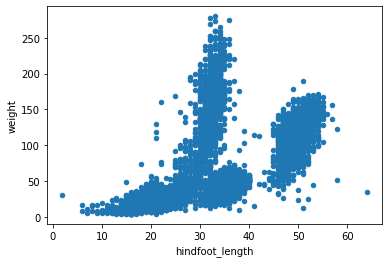

In [5]:
surveys = pd.read_csv("data/surveys.csv")
my_plot = surveys.plot("hindfoot_length", "weight", kind="scatter")
plt.show() # not necessary in Jupyter Notebooks


The returned object is a matplotlib object (check it yourself with `type(my_plot)`),
to which we may make further adjustments and refinements using other matplotlib methods.

> ## Tip
> Matplotlib itself can be overwhelming, so a useful strategy is to
> do as much as you easily can in a convenience layer, _i.e._ start
> creating the plot in Pandas or plotnine, and then use matplotlib
> for the rest.

We will cover a few basic commands for creating and formatting plots with matplotlib in this lesson.
A great resource for help creating and styling your figures is the matplotlib gallery
(<http://matplotlib.org/gallery.html>), which includes plots in many different
styles and the source codes that create them.



### `plt` pyplot versus object-based matplotlib

Matplotlib integrates nicely with the NumPy package and can use NumPy arrays
as input to the available plot functions. Consider the following example data,
created with NumPy by drawing 1000 samples from a normal distribution with a mean value of 0 and
a standard deviation of 0.1:

In [9]:
import numpy as np
sample_data = np.random.normal(0, 0.1, 1000)


To plot a histogram of our draws from the normal distribution, we can use the `hist` function directly:


(array([  8.,  25.,  79., 141., 214., 246., 159.,  84.,  33.,  11.]),
 array([-0.31511708, -0.25296412, -0.19081117, -0.12865822, -0.06650527,
        -0.00435231,  0.05780064,  0.11995359,  0.18210654,  0.2442595 ,
         0.30641245]),
 <a list of 10 Patch objects>)

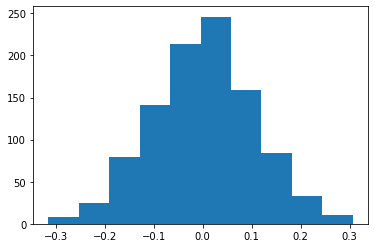

In [10]:
plt.hist(sample_data)


> ## Tip: Cross-Platform Visualization of Figures
> Jupyter Notebooks make many aspects of data analysis and visualization much simpler. This includes
> doing some of the labor of visualizing plots for you. But, not every one of your collaborators
> will be using a Jupyter Notebook. The `.show()` command allows you to visualize plots
> when working at the command line, with a script, or at the IPython interpreter. In the
> previous example, adding  `plt.show()` after the creation of the plot will enable your
> colleagues who aren't using a Jupyter notebook to reproduce your work on their platform.

or create matplotlib `figure` and `axis` objects first and subsequently add a histogram with 30


(array([ 1.,  2.,  5.,  9.,  4., 12., 15., 22., 42., 29., 50., 62., 76.,
        71., 67., 98., 66., 82., 76., 51., 32., 39., 18., 27., 14., 13.,
         6.,  5.,  2.,  4.]),
 array([-0.31511708, -0.29439943, -0.27368178, -0.25296412, -0.23224647,
        -0.21152882, -0.19081117, -0.17009352, -0.14937587, -0.12865822,
        -0.10794057, -0.08722292, -0.06650527, -0.04578762, -0.02506997,
        -0.00435231,  0.01636534,  0.03708299,  0.05780064,  0.07851829,
         0.09923594,  0.11995359,  0.14067124,  0.16138889,  0.18210654,
         0.20282419,  0.22354184,  0.2442595 ,  0.26497715,  0.2856948 ,
         0.30641245]),
 <a list of 30 Patch objects>)

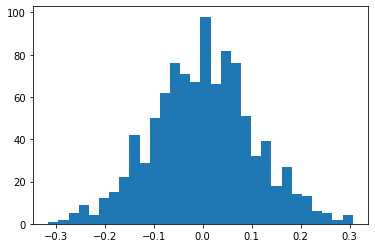

In [11]:
fig, ax = plt.subplots()  # initiate an empty figure and axis matplotlib object
ax.hist(sample_data, 30)


Although the latter approach requires a little bit more code to create the same plot,
the advantage is that it gives us **full control** over the plot and we can add new items
such as labels, grid lines, title, and other visual elements. For example, we can add
additional axes to the figure and customize their labels:

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.2035156, -0.1035156, -0.0035156,  0.0964844,  0.1964844,
         0.2964844,  0.3964844,  0.4964844,  0.5964844,  0.6964844,
         0.7964844]),
 <a list of 10 Patch objects>)

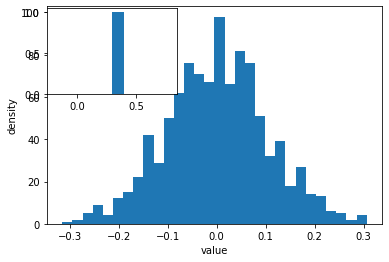

In [12]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.hist(sample_data, 30)

# Add a plot of a Beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a, b)
# adapt the labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# add additional axes to the figure
ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
#ax2 = fig.add_axes([left, bottom, right, top])
ax2.hist(beta_draws)


> ## Challenge - Drawing from distributions
> Have a look at [`numpy.random` documentation](https://docs.scipy.org/doc/numpy/reference/random/index.html).
> Choose a distribution you have no familiarity with, and try to sample from and visualize it.



### Link matplotlib, Pandas and plotnine

When we create a plot using pandas or plotnine, both libraries use matplotlib
to create those plots. The plots created in pandas or plotnine are matplotlib
objects, which enables us to use some of the advanced plotting options available
in the matplotlib library. Because the objects output by pandas and plotnine
can be read by matplotlib, we have many more options than any one library can
provide, offering a consistent environment to make publication-quality visualizations.


Text(0.5, 0.98, 'Scatter plot of weight versus hindfoot length')

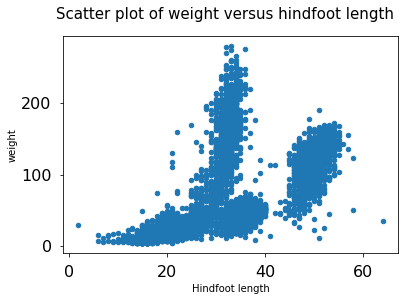

In [13]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure

surveys.plot("hindfoot_length", "weight", kind="scatter", ax=ax1)

# Provide further adaptations with matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

To retrieve the matplotlib figure object from plotnine for customization, use the `draw()` function in plotnine:


C:\Users\yorksea\anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 4811 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


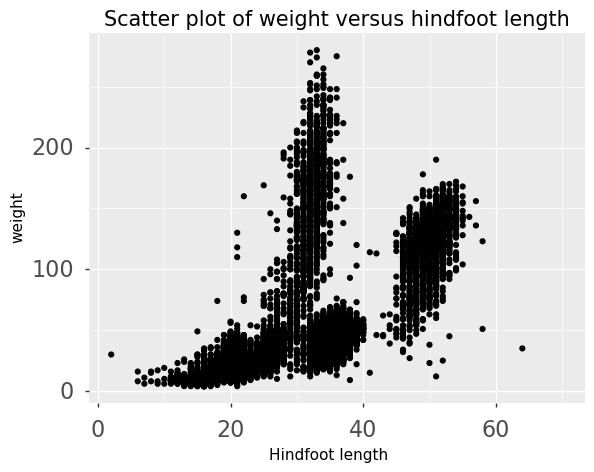

In [18]:
import plotnine as p9
myplot = (p9.ggplot(data=surveys,
                    mapping=p9.aes(x='hindfoot_length', y='weight')) +
              p9.geom_point())

# convert output plotnine to a matplotlib object
my_plt_version = myplot.draw()

# Provide further adaptations with matplotlib:
p9_ax = my_plt_version.axes[0] # each subplot is an item in a list
p9_ax.set_xlabel("Hindfoot length")
p9_ax.tick_params(labelsize=16, pad=8)
p9_ax.set_title('Scatter plot of weight versus hindfoot length', fontsize=15)
plt.show() # not necessary in Jupyter Notebooks


> ## Challenge - Pandas and matplotlib
> Load the streamgage data set with Pandas, subset the week of the 2013 Front Range flood
> (September 11 through 15) and create a hydrograph (line plot) of the discharge data using
> Pandas, linking it to an empty maptlotlib `ax` object. Create a second axis that displays the
> whole dataset. Adapt the title and axes' labels using matplotlib.
> 
> ### Answers

Text(0.5, 1.0, ' Front Range flood event 2013')

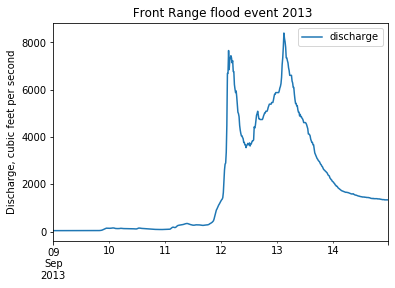

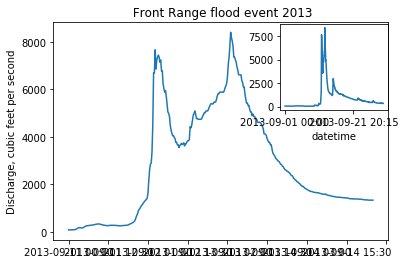

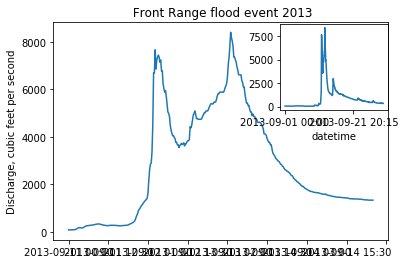

In [21]:
# Challenge Answer
import matplotlib.pyplot as plt
discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                        skiprows=27, delimiter="\t",
                        names=["agency", "site_id", "datetime",
                               "timezone", "discharge", "discharge_cd"])
discharge["datetime"] = pd.to_datetime(discharge["datetime"])
front_range = discharge[(discharge["datetime"] >= "2013-09-09") &
                        (discharge["datetime"] < "2013-09-15")]

fig, ax = plt.subplots()
front_range.plot(x ="datetime", y="discharge", ax=ax)
ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.set_title(" Front Range flood event 2013")
discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                      skiprows=27, delimiter="\t",
                      names=["agency", "site_id", "datetime",
                             "timezone", "flow_rate", "height"])
fig, ax = plt.subplots()
flood = discharge[(discharge["datetime"] >= "2013-09-11") &
                  (discharge["datetime"] < "2013-09-15")]

ax2 = fig.add_axes([0.65, 0.575, 0.25, 0.3])
flood.plot(x ="datetime", y="flow_rate", ax=ax)
discharge.plot(x ="datetime", y="flow_rate", ax=ax2)
ax2.legend().set_visible(False)
ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title(" Front Range flood event 2013")
discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                      skiprows=27, delimiter="\t",
                      names=["agency", "site_id", "datetime",
                             "timezone", "flow_rate", "height"])
fig, ax = plt.subplots()
flood = discharge[(discharge["datetime"] >= "2013-09-11") &
                  (discharge["datetime"] < "2013-09-15")]

ax2 = fig.add_axes([0.65, 0.575, 0.25, 0.3])
flood.plot(x ="datetime", y="flow_rate", ax=ax)
discharge.plot(x ="datetime", y="flow_rate", ax=ax2)
ax2.legend().set_visible(False)

ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title(" Front Range flood event 2013")


### Saving matplotlib figures

Once satisfied with the resulting plot, you can save the plot with the `.savefig(*args)` method from matplotlib:

In [22]:
fig.savefig("my_plot_name.png")


which will save the `fig` created using Pandas/matplotlib as a png file with the name `my_plot_name`

> ## Tip: Saving figures in different formats
> Matplotlib recognizes the extension used in the filename and
> supports (on most computers) png, pdf, ps, eps and svg formats.


> ## Challenge - Saving figure to file
> Check the documentation of the `savefig` method and check how
> you can comply to journals requiring figures as `pdf` file with
> dpi >= 300.
>
> > ## Answers

In [27]:
# Challenge Answer
fig.savefig("my_plot_name.pdf", dpi=300)